<h1 align="center">InfraSafe</h1>

In [7]:
import numpy as np

In [8]:
from ultralytics import YOLO
# Load the model using Ultralytics
model = YOLO('yolov8_trained_model.pt')

**Risk Assessment**

The inclusion of a risk assessment function allows users to receive a clear evaluation of structural integrity based on the analysis, categorizing the risk level into Low, Moderate, or High.

In [18]:
def analyze_damage(results, frame):
    """
    Analyze structural integrity based on detected damage.
    - Bounding box count & size for severity analysis
    - Grayscale intensity variation for degradation estimation
    - Structural risk score calculation
    """
    total_damage_area = 0
    frame_area = frame.shape[0] * frame.shape[1]

    for result in results:
        for box in result.boxes.xyxy:  # Extract bounding box coordinates
            x1, y1, x2, y2 = map(int, box)  # Get bounding box as integers
            bbox_area = (x2 - x1) * (y2 - y1)
            total_damage_area += bbox_area

    damage_percentage = (total_damage_area / frame_area) * 100
 # Grayscale variation for material degradation
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    intensity_variation = np.std(gray_frame)  # Standard deviation of pixel intensities

    # Structural risk score (higher means worse condition)
    risk_score = (damage_percentage * 0.6) + (intensity_variation * 0.4)
    risk_level = "Low" if risk_score < 20 else "Moderate" if risk_score < 50 else "High"

    print(f"Total Damage Area: {total_damage_area} pixels")
    print(f"Damage Coverage: {damage_percentage:.2f}% of the frame")
    print(f"Material Degradation Level: {intensity_variation:.2f}")
    print(f"Structural Risk Score: {risk_score:.2f} ({risk_level})")


    return risk_level

Testing on some test images


0: 640x640 2 cracks, 185.8ms
Speed: 5.9ms preprocess, 185.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Total Damage Area: 369948 pixels
Damage Coverage: 90.32% of the frame
Material Degradation Level: 7.52
Structural Risk Score: 57.20 (High)
Risk Level for crack_108_jpg.rf.197a1551e12f268769b37cdc0d1db517.jpg: High


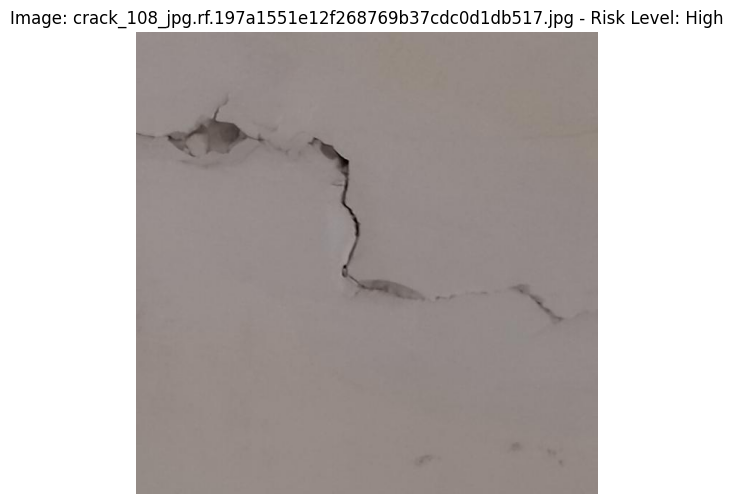


0: 640x640 1 crack, 195.8ms
Speed: 8.9ms preprocess, 195.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Total Damage Area: 80640 pixels
Damage Coverage: 19.69% of the frame
Material Degradation Level: 8.89
Structural Risk Score: 15.37 (Low)
Risk Level for crack_158_jpg.rf.090b85f3be2e9043dcc91d5115c9455d.jpg: Low


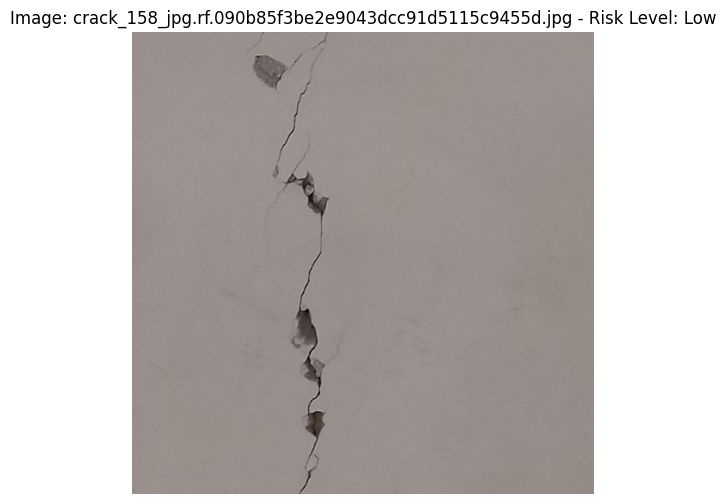


0: 640x640 1 crack, 200.1ms
Speed: 7.5ms preprocess, 200.1ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)
Total Damage Area: 70180 pixels
Damage Coverage: 17.13% of the frame
Material Degradation Level: 7.30
Structural Risk Score: 13.20 (Low)
Risk Level for crack_170_jpg.rf.63f3db3ab3c16d5dd5628c4b15eba00e.jpg: Low


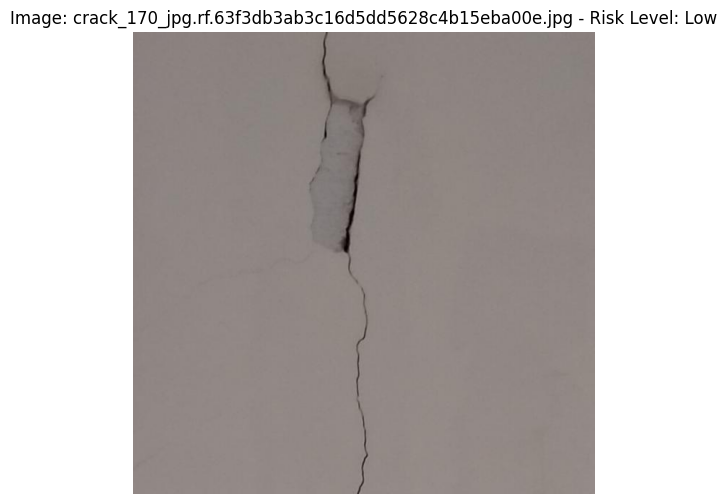


0: 640x640 2 cracks, 125.0ms
Speed: 5.0ms preprocess, 125.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Total Damage Area: 162918 pixels
Damage Coverage: 39.77% of the frame
Material Degradation Level: 4.14
Structural Risk Score: 25.52 (Moderate)
Risk Level for crack_184_jpg.rf.1970b1acc655122be46b82005cc064b8.jpg: Moderate


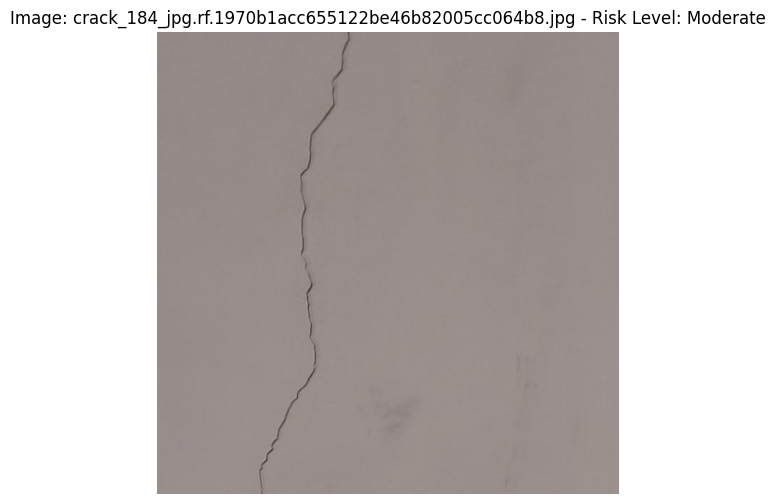


0: 640x640 1 crack, 207.9ms
Speed: 2.4ms preprocess, 207.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Total Damage Area: 317000 pixels
Damage Coverage: 77.39% of the frame
Material Degradation Level: 9.57
Structural Risk Score: 50.26 (High)
Risk Level for crack_69_jpg.rf.229d4a59e7f804834a0eaba87d7b1a76.jpg: High


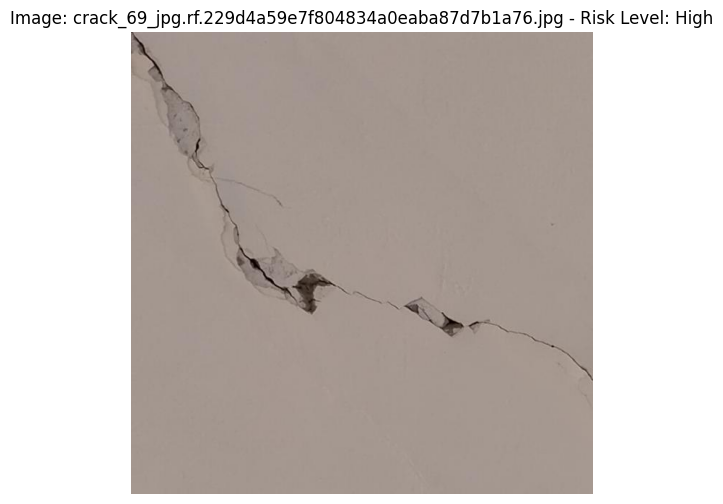


0: 640x640 1 crack, 204.9ms
Speed: 0.9ms preprocess, 204.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Total Damage Area: 114560 pixels
Damage Coverage: 27.97% of the frame
Material Degradation Level: 11.53
Structural Risk Score: 21.39 (Moderate)
Risk Level for crack_727_jpg.rf.01442a8d11ce1f2462be81518831c54a.jpg: Moderate


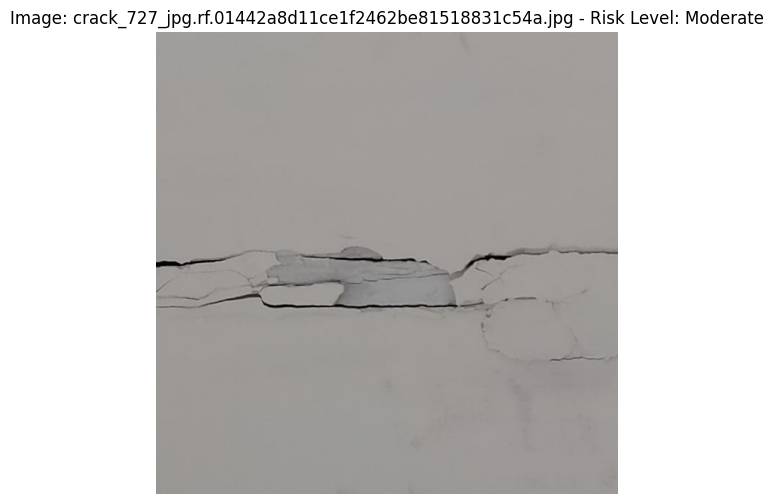

In [20]:
import os
import cv2
import matplotlib.pyplot as plt

# Ensure 'model' and 'analyze_damage' are defined

# Set input and output directories
input_dir = "test"
output_dir = "Output"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image in the input directory
for img_name in os.listdir(input_dir):
    image_path = os.path.join(input_dir, img_name)  # Full path to the image

    # Load the image
    frame = cv2.imread(image_path)

    # Convert BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model.predict(source=frame)

    # Analyze damage
    risk_level = analyze_damage(results, frame)
    print(f"Risk Level for {img_name}: {risk_level}")

    # Display the image with risk level
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Image: {img_name} - Risk Level: {risk_level}")
    plt.axis('off')
    plt.show()

    # Save results
    for result in results:
        output_path = os.path.join(output_dir, f"{os.path.splitext(img_name)[0]}_output.jpg")
        result.save(output_path)